# Week 07 - Correlation

## Correlation

* anything above .9 do something about it
* between .5 and .7 may need a closer look

Correlation does not imply cause causation. Warm days on the beach, ice cream, and shark bites.

### Pearson’s r (correlation coefficient)

$\rho_{x,y} = \frac{cov(x,y)}{\sigma_x\sigma_y} = \frac{\frac{1}{N}\sum(x-\bar{x})(y-\bar{y})}{\sqrt\frac{\sum(x-\bar{x})^2}{N}\sqrt\frac{\sum(y-\bar{y})^2}{N}}  = \frac{\sum(x-\bar{x})(y-\bar{y})}{\sqrt{\sum(x-\bar{x})^2}\sqrt{\sum(y-\bar{y})^2}}$

* Shows linear relationship between two continuous variables
* How one variable changes as another variable changes
* Measures both strength and direction

https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php<br />
https://www.mygreatlearning.com/blog/covariance-vs-correlation/

### Covariance

$cov(x, y) = \frac{1}{N} \sum_{i=1}^{N}(x_i - \bar{x}) (y_i - \bar{y})$

* Shows how variables change together
* A measure of correlation
* Measures direction

### Multicollinearity

* Makes it difficult to determine which independent variables are influencing the dependent variable
* If you want inference, multicollinearity is problematic.
* But if you want prediction accuracy, there is no problem of overlapping explaination of data as long as the correlation between the predictors doesn't change. The problem from the correlated predictors is more on the side of expected test error (MSE)

https://stats.stackexchange.com/questions/225945/multiple-linear-regression-with-multicollinearity-residual-regression

### Correlation vs Multicollinearity

* Correlation measures how two or more variables move together (good between independent and dependent variables)
* (Mutli)collinearity shows a linear relationship, usually high, between features

### Variance Inflation Factor (VIF)

https://towardsdatascience.com/statistics-in-python-collinearity-and-multicollinearity-4cc4dcd82b3f 

* Minimum possible value is one
* Values over 10 mean multicollinearity

## Multicollinearity

The need to reduce multicollinearity depends on its severity and your primary goal for your regression model. Keep the following three points in mind:

* The severity of the problems increases with the degree of the multicollinearity. Therefore, if you have only moderate multicollinearity, you may not need to resolve it.
* Multicollinearity affects only the specific independent variables that are correlated. Therefore, if multicollinearity is not present for the independent variables that you are particularly interested in, you may not need to resolve it. Suppose your model contains the experimental variables of interest and some control variables. If high multicollinearity exists for the control variables but not the experimental variables, then you can interpret the experimental variables without problems.
* Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.

https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/

In [1]:
# get data
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('mariokart.csv', index_col=0)

# delete constant quasi constant variables
df.drop(['Luigi', 'Baby Mario', 'Birdo'], axis=1, inplace=True)

# impute missing values with mean, median, and mode
df['Toad'].fillna(round(df['Toad'].mean(), 2), inplace=True)
df['Koopa Troopa'].fillna(round(df['Koopa Troopa'].mean(), 2), inplace=True)
df['Bowser'].fillna(round(df['Bowser'].mean(), 2), inplace=True)
df['Donkey Kong'].fillna(df['Donkey Kong'].median(), inplace=True)
df['Princess Peach'].fillna(df['Princess Peach'].median(), inplace=True)
df['Isabelle'].fillna(df['Isabelle'].median(), inplace=True)
df['Wario'].fillna(df['Wario'].mode()[0], inplace=True)
df.isnull().sum()

# train test split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Mario Kart'], axis=1), df['Mario Kart'], test_size=.2, random_state=42)


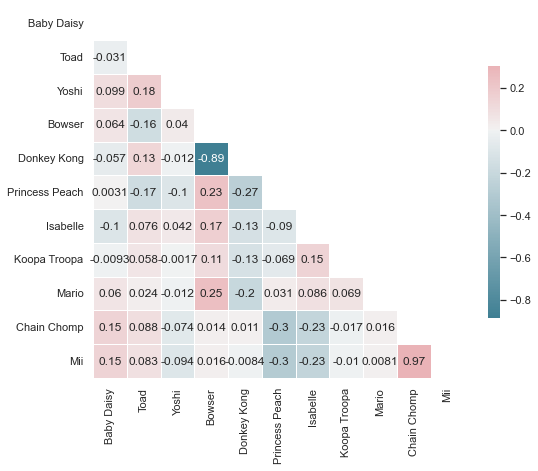

In [2]:
# correlation heat map
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr = X_train.corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
# f, ax = plt.subplots()
f = plt.figure(figsize=(8, 8))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

plt.tight_layout()

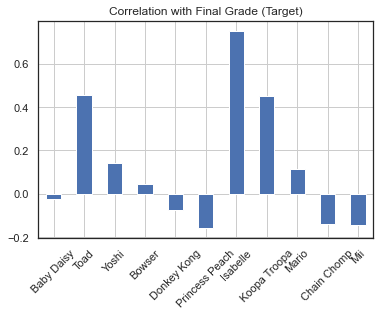

In [3]:
# correlation with target
X_train.corrwith(y_train).plot.bar(
        title = 'Correlation with Final Grade (Target)', rot = 45, grid = True);

### Variance Inflation Factor

In statistics, the variance inflation factor (VIF) is the ratio (quotient) of the variance of estimating some parameter in a model that includes multiple other terms (parameters) by the variance of a model constructed using only one term. It quantifies the severity of multicollinearity in an ordinary least squares regression analysis. It provides an index that measures how much the variance (the square of the estimate's standard deviation) of an estimated regression coefficient is increased because of collinearity.

https://en.wikipedia.org/wiki/Variance_inflation_factor

In [4]:
# https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = X_train._get_numeric_data().copy()
# add constant
X.insert(0, 'const', 1)

# create dataframe to store vif information
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# remove constant (first row) and show vif dataframe
X.drop('const', axis=1, inplace=True)
vif = vif.iloc[1: , :]
vif

,Variable,VIF
1,Baby Daisy,1.053782
2,Toad,1.114991
3,Yoshi,1.099712
4,Bowser,5.055688
5,Donkey Kong,4.942017
6,Princess Peach,1.304524
7,Isabelle,1.187685
8,Koopa Troopa,1.050887
9,Mario,1.081578
10,Chain Chomp,20.879272


### Interpret VIF

* A value of 1 indicates there is no correlation between a given explanatory variable and any other explanatory variables in the model
* A value between 1 and 5 indicates moderate correlation between a given explanatory variable and other explanatory variables in the model, but this is often not severe enough to require attention
* A value greater than 5 indicates potentially severe correlation between a given explanatory variable and other explanatory variables in the model

https://www.statology.org/how-to-calculate-vif-in-python/

### Standardizing Data 

* If p-values are low but VIF is high, try standardizing (centering the data)

https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/

### Correlation with Code

In [5]:
# code the correlated relationships
import numpy as np

corrs = X.corr()

# get max of each column and row location
for i in range(len(corrs.columns)):
    for j in range(i):
        if abs(corrs.iloc[i, j]) > .5:
            print(f'{corrs.columns[i]} and {corrs.columns[j]}: {abs(corrs.iloc[i, j])}')
            
corrs

Donkey Kong and Bowser: 0.8859258540295311
Mii and Chain Chomp: 0.9747794338923957


,Baby Daisy,Toad,Yoshi,Bowser,Donkey Kong,Princess Peach,Isabelle,Koopa Troopa,Mario,Chain Chomp,Mii
Baby Daisy,1.000000,-0.031402,0.098896,0.064237,-0.056662,0.003100,-0.099609,-0.009263,0.060222,0.148991,0.147477
Toad,-0.031402,1.000000,0.182783,-0.159704,0.130029,-0.168969,0.076307,0.057558,0.023525,0.087568,0.083011
Yoshi,0.098896,0.182783,1.000000,0.039707,-0.011693,-0.102023,0.041680,-0.001749,-0.011995,-0.074369,-0.093598
Bowser,0.064237,-0.159704,0.039707,1.000000,-0.885926,0.233934,0.168762,0.108112,0.247978,0.014440,0.016000
Donkey Kong,-0.056662,0.130029,-0.011693,-0.885926,1.000000,-0.268349,-0.131191,-0.129870,-0.200532,0.011113,-0.008372
Princess Peach,0.003100,-0.168969,-0.102023,0.233934,-0.268349,1.000000,-0.090206,-0.069262,0.031241,-0.303693,-0.299528
Isabelle,-0.099609,0.076307,0.041680,0.168762,-0.131191,-0.090206,1.000000,0.146696,0.085744,-0.226281,-0.233193
Koopa Troopa,-0.009263,0.057558,-0.001749,0.108112,-0.129870,-0.069262,0.146696,1.000000,0.068537,-0.017241,-0.010208
Mario,0.060222,0.023525,-0.011995,0.247978,-0.200532,0.031241,0.085744,0.068537,1.000000,0.015970,0.008096
Chain Chomp,0.148991,0.087568,-0.074369,0.014440,0.011113,-0.303693,-0.226281,-0.017241,0.015970,1.000000,0.974779


In [6]:
X_train.drop(['Mii'], axis=1, inplace=True)
X_test.drop(['Mii'], axis=1, inplace=True)

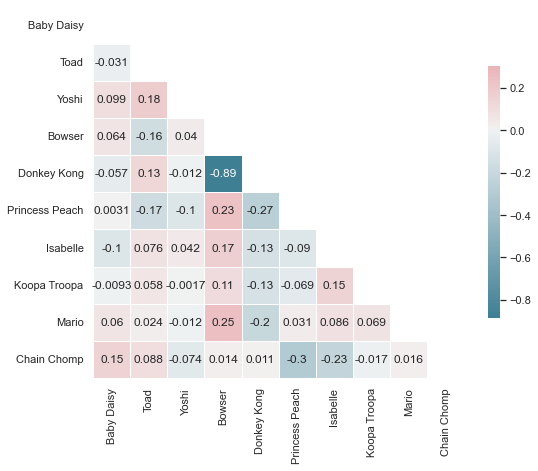

In [7]:
# correlation heat map
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr = X_train.corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
# f, ax = plt.subplots()
f = plt.figure(figsize=(8, 8))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

plt.tight_layout()

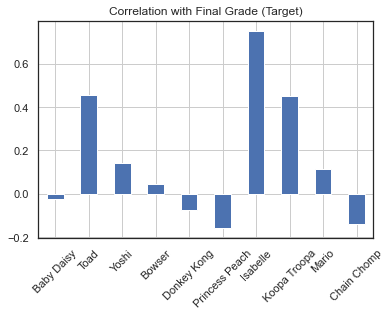

In [8]:
# correlation with target
X_train.corrwith(y_train).plot.bar(
        title = 'Correlation with Final Grade (Target)', rot = 45, grid = True);

In [9]:
# https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = X_train._get_numeric_data().copy()
# add constant
X.insert(0, 'const', 1)

# create dataframe to store vif information
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# remove constant (first row) and show vif dataframe
vif = vif.iloc[1: , :]
vif

,Variable,VIF
1,Baby Daisy,1.053417
2,Toad,1.114926
3,Yoshi,1.089375
4,Bowser,4.979999
5,Donkey Kong,4.807829
6,Princess Peach,1.298841
7,Isabelle,1.182814
8,Koopa Troopa,1.050541
9,Mario,1.080399
10,Chain Chomp,1.272743


In [10]:
X_train.drop(['Donkey Kong'], axis=1, inplace=True)
X_test.drop(['Donkey Kong'], axis=1, inplace=True)

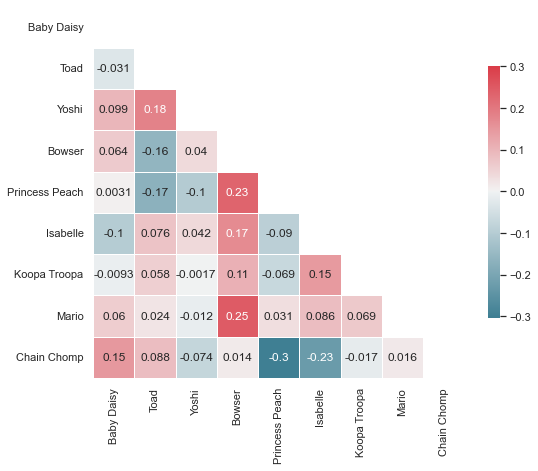

In [11]:
# correlation heat map
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr = X_train.corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
# f, ax = plt.subplots()
f = plt.figure(figsize=(8, 8))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

plt.tight_layout()

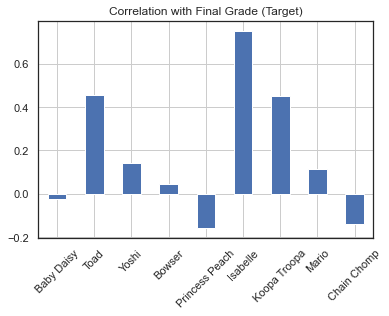

In [12]:
# correlation with target
X_train.corrwith(y_train).plot.bar(
        title = 'Correlation with Final Grade (Target)', rot = 45, grid = True);

## Engineering a Solution

In [13]:
# get data
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('mariokart.csv', index_col=0)

# delete constant quasi constant variables
df.drop(['Luigi', 'Baby Mario', 'Birdo'], axis=1, inplace=True)

# impute missing values with mean, median, and mode
df['Toad'].fillna(round(df['Toad'].mean(), 2), inplace=True)
df['Koopa Troopa'].fillna(round(df['Koopa Troopa'].mean(), 2), inplace=True)
df['Bowser'].fillna(round(df['Bowser'].mean(), 2), inplace=True)
df['Donkey Kong'].fillna(df['Donkey Kong'].median(), inplace=True)
df['Princess Peach'].fillna(df['Princess Peach'].median(), inplace=True)
df['Isabelle'].fillna(df['Isabelle'].median(), inplace=True)
df['Wario'].fillna(df['Wario'].mode()[0], inplace=True)
df.isnull().sum()

# train test split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Mario Kart'], axis=1), df['Mario Kart'], test_size=.2, random_state=42)


In [14]:
# https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = X_train._get_numeric_data().copy()
# add constant
X.insert(0, 'const', 1)

# create dataframe to store vif information
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# remove constant (first row) and show vif dataframe
vif = vif.iloc[1: , :]
vif

,Variable,VIF
1,Baby Daisy,1.053782
2,Toad,1.114991
3,Yoshi,1.099712
4,Bowser,5.055688
5,Donkey Kong,4.942017
6,Princess Peach,1.304524
7,Isabelle,1.187685
8,Koopa Troopa,1.050887
9,Mario,1.081578
10,Chain Chomp,20.879272


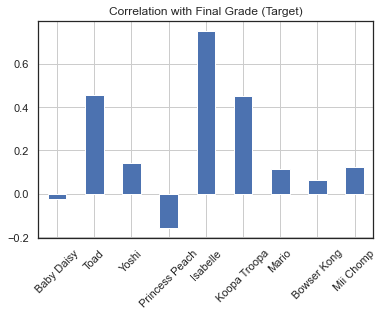

In [15]:
X_train['Bowser Kong'] = X_train['Bowser'] - X_train['Donkey Kong']
X_train['Mii Chomp'] = X_train['Mii'] - X_train['Chain Chomp']
X_train.drop(['Donkey Kong', 'Bowser', 'Mii', 'Chain Chomp'], axis=1, inplace=True)
X_train.corrwith(y_train).plot.bar(
        title = 'Correlation with Final Grade (Target)', rot = 45, grid = True);